# Project #1 Outline

## Title: People in search of savings?

## Overview:
This mini-research explores how the shift from the gold standard to fiat currency has influenced investor behavior towards higher-risk investments. The hypothesis is that the fiat currency's tendency to devalue wealth due to inflation drives individuals to seek higher returns through riskier investments.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.simplefilter("ignore")
import matplotlib.ticker as ticker

## Q1: What percentage of american population own common stocks 1900-2023?
### About:
It is quite hard to gather information on that specific topic. However, since it is just for fun, I have decided to move on with the data provided by this website: https://start.askwonder.com/insights/percentage-americans-or-american-households-owned-common-stock-years-i-m-looking-hxq1u37u5

In [189]:
stockownership=pd.read_csv("StockOwnership precent of population.csv")
# Drop waste
stockownership.drop(index=0, axis=0, inplace=True)
stockownership.drop(index=1, axis=0, inplace=True)
stockownership.drop(["Unnamed: 0"], axis=1, inplace=True)
# Rebuild columns and index
stockownership.rename(columns={"Unnamed: 1":"Year", "Unnamed: 2":"Precent of population"}, inplace=True)
stockownership.drop(index=2, axis=0, inplace=True)
stockownership.set_index(["Year"], inplace = True)
stockownership.index = pd.to_datetime(stockownership.index)
stockownership.index = stockownership.index.year
# Change object type
stockownership["Precent of population"]=stockownership["Precent of population"].astype(int)
stockownership.dtypes

Precent of population    int64
dtype: object

In [190]:
# Stock-ownership dataframe ready for ploting
stockownership

,Precent of population
Year,
1900,1
1928,3
1930,10
1952,4
1959,11
1970,15
1980,13
1989,32
1998,52


## Q2: How much gold held in federal reserve 1900-1990?
### About: 
For some reason, it was a bit challenging to find the data on gold held in reserve. Fortunately, I found numerous Federal Reserve Bulletins on FRASER: https://fraser.stlouisfed.org/title/federal-reserve-bulletin-62

In [191]:
goldheld=pd.read_csv("Gold held in the Federal Reserve since 1900.csv")
# Drop waste
goldheld.drop(index=0, axis=0, inplace=True)
# Rebuild columns and index
goldheld.rename(columns={"Unnamed: 0":"Year", "Unnamed: 1":"Gold in dollars"}, inplace=True)
goldheld.set_index(['Year'], inplace=True)
goldheld.index=pd.to_datetime(goldheld.index)
goldheld.index= goldheld.index.year
# Change object type
goldheld["Gold in dollars"]=goldheld["Gold in dollars"].astype(float)

In [192]:
# Gold held in reserve dataframe ready for ploting
goldheld

,Gold in dollars
Year,
1900,511.465
1901,532.656
1902,562.697
1903,544.836
1904,590.162
...,...
1986,11084.000
1987,11078.000
1988,11060.000


# Graphs to compare

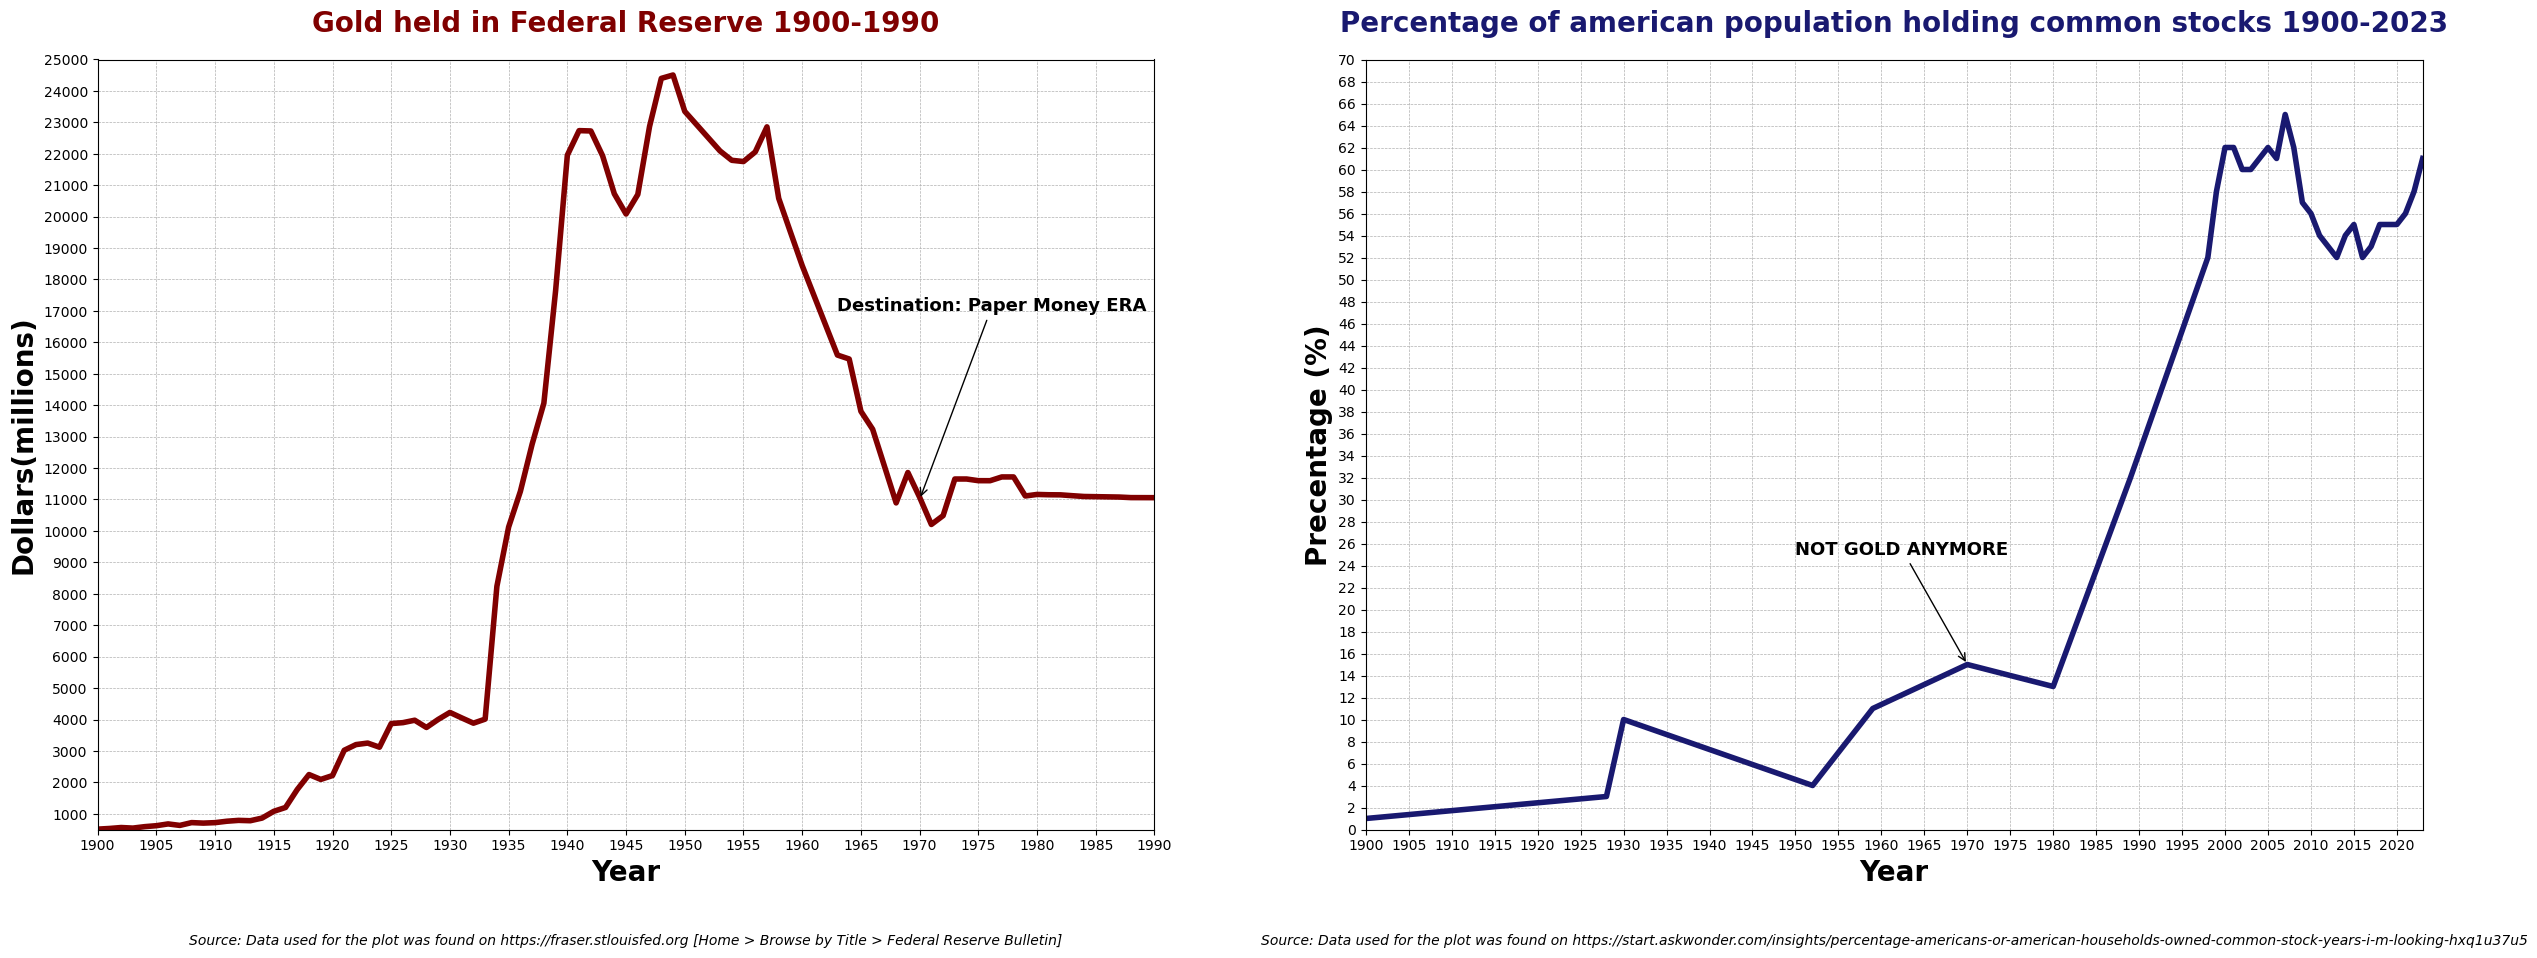

In [193]:
fig, (ax2, ax1) = plt.subplots(1,2,figsize=(30, 10))

# StockOwnership Plot

x1 = stockownership.index
y1 = stockownership["Precent of population"]
ax1.plot(x1,y1, color = "midnightblue", markersize=5, linewidth=4)
ax1.set_xlim([1900, 2023])
ax1.set_ylim([0, 70])


# Set major ticks at every 5-year interval
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))

# Set the grid 
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
# Set ticks at every 2-percent interval
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
# Set labels
ax1.set_xlabel("Year", fontsize=20, fontweight='bold')
ax1.set_ylabel("Precentage (%)", fontsize=20, fontweight='bold')
ax1.set_title("Percentage of american population holding common stocks 1900-2023",fontsize=20, fontweight='bold',color="midnightblue", pad=20)

# Set arrow to highlight 1970
ax1.annotate("NOT GOLD ANYMORE", xy=(1970, 15), xytext=(1950, 25),
            arrowprops=dict(color="black", arrowstyle="->"), fontsize=13, fontweight='bold')

# Bibliography
ax1.text(0.5,-0.15,'Source: Data used for the plot was found on https://start.askwonder.com/insights/percentage-americans-or-american-households-owned-common-stock-years-i-m-looking-hxq1u37u5', ha='center',fontsize=10,fontstyle="italic",transform=ax1.transAxes)

# Gold held in reserve Plot

x2 = goldheld.index
y2 = goldheld["Gold in dollars"]
ax2.plot(x2,y2, color = "maroon", markersize=5,linewidth=4)
ax2.set_xlim([1900, 1990])
ax2.set_ylim([500, 25000])

# Set major ticks at every 5-year interval
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5))

# Set the grid 
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
# Set ticks at every 1000-dollar interval
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1000))

# Set labels
ax2.set_xlabel("Year", fontsize=20, fontweight='bold')
ax2.set_ylabel("Dollars(millions)", fontsize=20, fontweight='bold')
ax2.set_title("Gold held in Federal Reserve 1900-1990",fontsize=20, fontweight='bold',color="maroon", pad=20)

# Set arrow to highlight 1970
ax2.annotate("Destination: Paper Money ERA", xy=(1970, 11000), xytext=(1963, 17000),
            arrowprops=dict(color="black", arrowstyle="->"), fontsize=13, fontweight='bold')


# Bibliography
ax2.text(0.5,-0.15,'Source: Data used for the plot was found on https://fraser.stlouisfed.org [Home > Browse by Title > Federal Reserve Bulletin]', ha='center',fontsize=10,fontstyle="italic",transform=ax2.transAxes)


# Adjust space between graphs
plt.subplots_adjust(wspace=0.2, hspace=0.2)

### Author: Polina Solodrai
@pplnsl